# Load packages

In [1]:
import random
import numpy as np
import gymnasium as gym
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from src.DQNAgent_module import DQNAgent
from src.DoubleDQNAgent_module import DoubleDQNAgent
from src.Trainer_module import Trainer
from src.Plotting_module import plot_learning_curves, plot_kernel_density, plot_rolling_averages, plot_test_results

# Train agents

In [2]:
# Initialize the environment
env_name = 'LunarLander-v2'
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Parameters for training
number_episodes = 4000
max_timesteps = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

# Train and compare DQN and Double DQN
num_runs = 5

# Create a Trainer instance for DQN
dqn_trainer = Trainer(DQNAgent, env_name, state_size, action_size, seed=12)
print("Training DQN...")
dqn_avg_rewards, dqn_avg_average_rewards, dqn_std_rewards, dqn_std_average_rewards, dqn_all_rewards, dqn_all_average_rewards, dqn_solved_episodes = dqn_trainer.train_multiple_runs(
    num_runs, number_episodes, max_timesteps, eps_start, eps_end, eps_decay)

# Create a Trainer instance for Double DQN
double_dqn_trainer = Trainer(DoubleDQNAgent, env_name, state_size, action_size, seed=12)
print("Training Double DQN...")
double_dqn_avg_rewards, double_dqn_avg_average_rewards, double_dqn_std_rewards, double_dqn_std_average_rewards, double_dqn_all_rewards, double_dqn_all_average_rewards, double_dqn_solved_episodes = double_dqn_trainer.train_multiple_runs(
    num_runs, number_episodes, max_timesteps, eps_start, eps_end, eps_decay)

# Collecting all variables into a dictionary
data_to_save = {
    "dqn_all_average_rewards": dqn_all_average_rewards,
    "double_dqn_all_average_rewards": double_dqn_all_average_rewards,
    "dqn_avg_average_rewards": dqn_avg_average_rewards,
    "dqn_std_average_rewards": dqn_std_average_rewards,
    "double_dqn_avg_average_rewards": double_dqn_avg_average_rewards,
    "double_dqn_std_average_rewards": double_dqn_std_average_rewards,
    "num_runs": num_runs,
    "dqn_all_rewards": dqn_all_rewards,
    "double_dqn_all_rewards": double_dqn_all_rewards,
    "dqn_solved_episodes": dqn_solved_episodes,
    "double_dqn_solved_episodes": double_dqn_solved_episodes
}

# Saving the data to a pickle file
with open('outputs/rewards_data.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

Training DQN...
Run 1/5 with seed 12
Episode 100	Average Score: -192.88
Episode 200	Average Score: -119.93
Episode 300	Average Score: -76.041
Episode 400	Average Score: 31.014
Episode 500	Average Score: 99.274
Episode 600	Average Score: 140.41
Episode 700	Average Score: 157.82
Episode 800	Average Score: 185.20
Episode 875	Average Score: 200.27
Environment solved in 775 episodes!	Average Score: 200.27
Episode 900	Average Score: 196.34
Episode 1000	Average Score: 218.74
Episode 1100	Average Score: 198.88
Episode 1200	Average Score: 219.70
Episode 1300	Average Score: 213.76
Episode 1400	Average Score: 225.12
Episode 1500	Average Score: 238.04
Episode 1600	Average Score: 230.64
Episode 1700	Average Score: 255.64
Episode 1800	Average Score: 264.46
Episode 1900	Average Score: 254.84
Episode 2000	Average Score: 256.90
Episode 2100	Average Score: 241.72
Episode 2200	Average Score: 246.75
Episode 2300	Average Score: 243.35
Episode 2400	Average Score: 255.87
Episode 2500	Average Score: 244.39
Ep

In [3]:
# Loading the data from the pickle file
with open('outputs/rewards_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extracting variables
dqn_all_average_rewards = loaded_data["dqn_all_average_rewards"]
double_dqn_all_average_rewards = loaded_data["double_dqn_all_average_rewards"]
dqn_avg_average_rewards = loaded_data["dqn_avg_average_rewards"]
dqn_std_average_rewards = loaded_data["dqn_std_average_rewards"]
double_dqn_avg_average_rewards = loaded_data["double_dqn_avg_average_rewards"]
double_dqn_std_average_rewards = loaded_data["double_dqn_std_average_rewards"]
num_runs = loaded_data["num_runs"]
dqn_all_rewards = loaded_data["dqn_all_rewards"]
double_dqn_all_rewards = loaded_data["double_dqn_all_rewards"]
dqn_solved_episodes = loaded_data["dqn_solved_episodes"] ,
double_dqn_solved_episodes = loaded_data["double_dqn_solved_episodes"]

## Training results plots

DQN solved episodes: ([775, 609, 626, 825, 528],)
Double DQN solved episodes: [641, 514, 513, 493, 629]


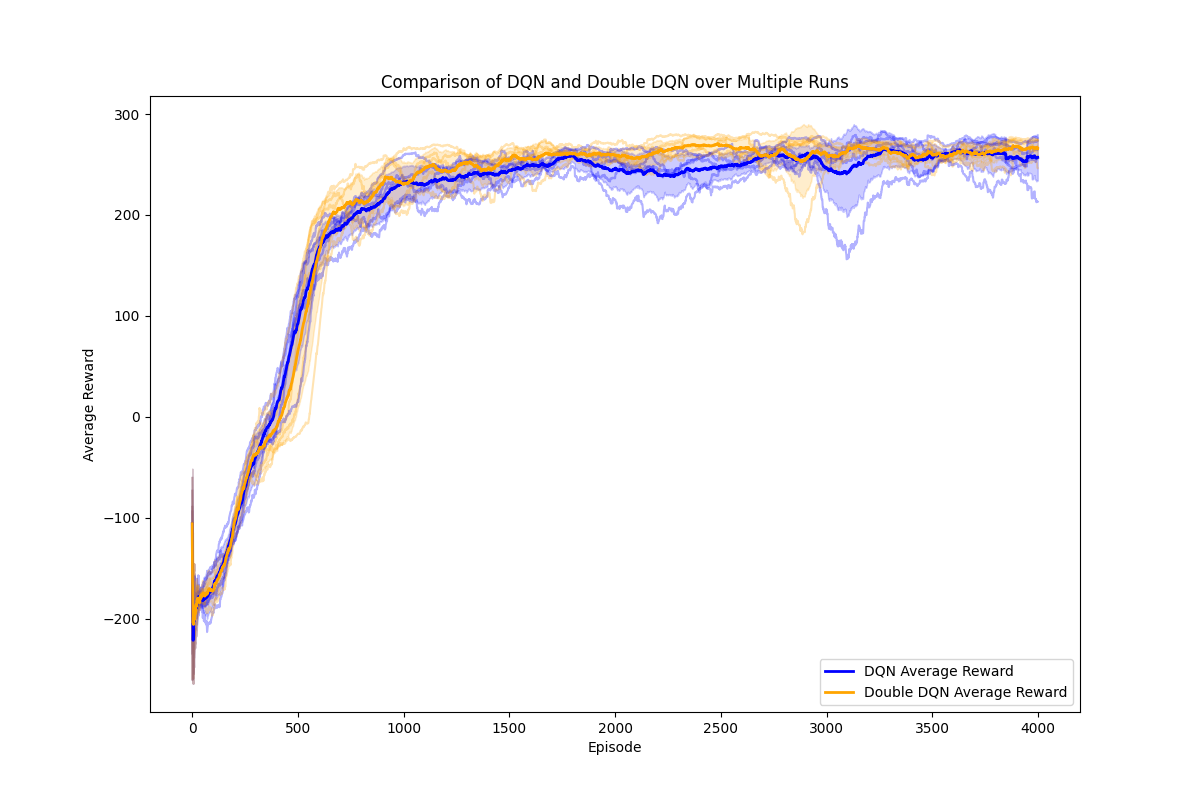

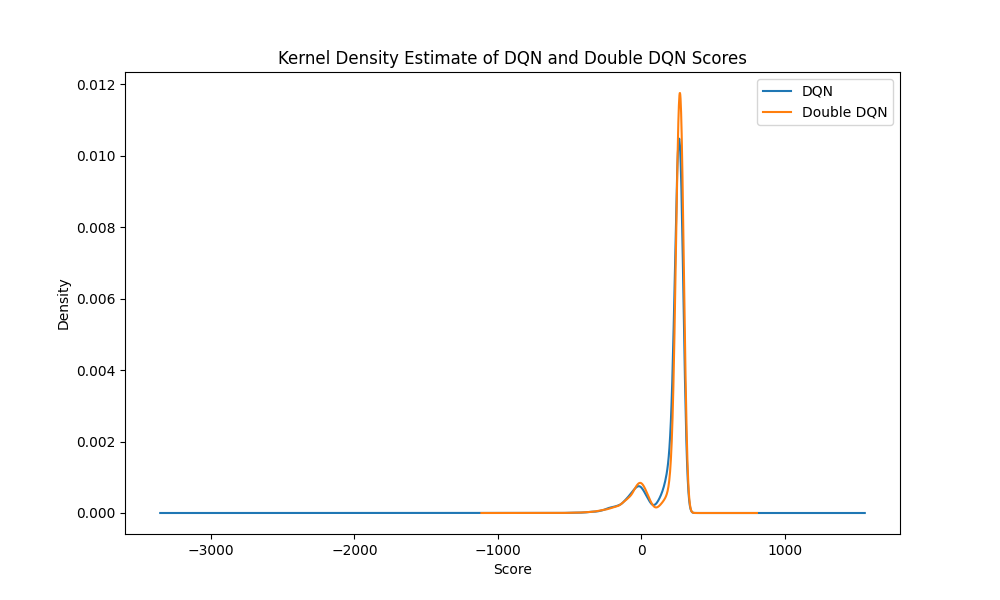

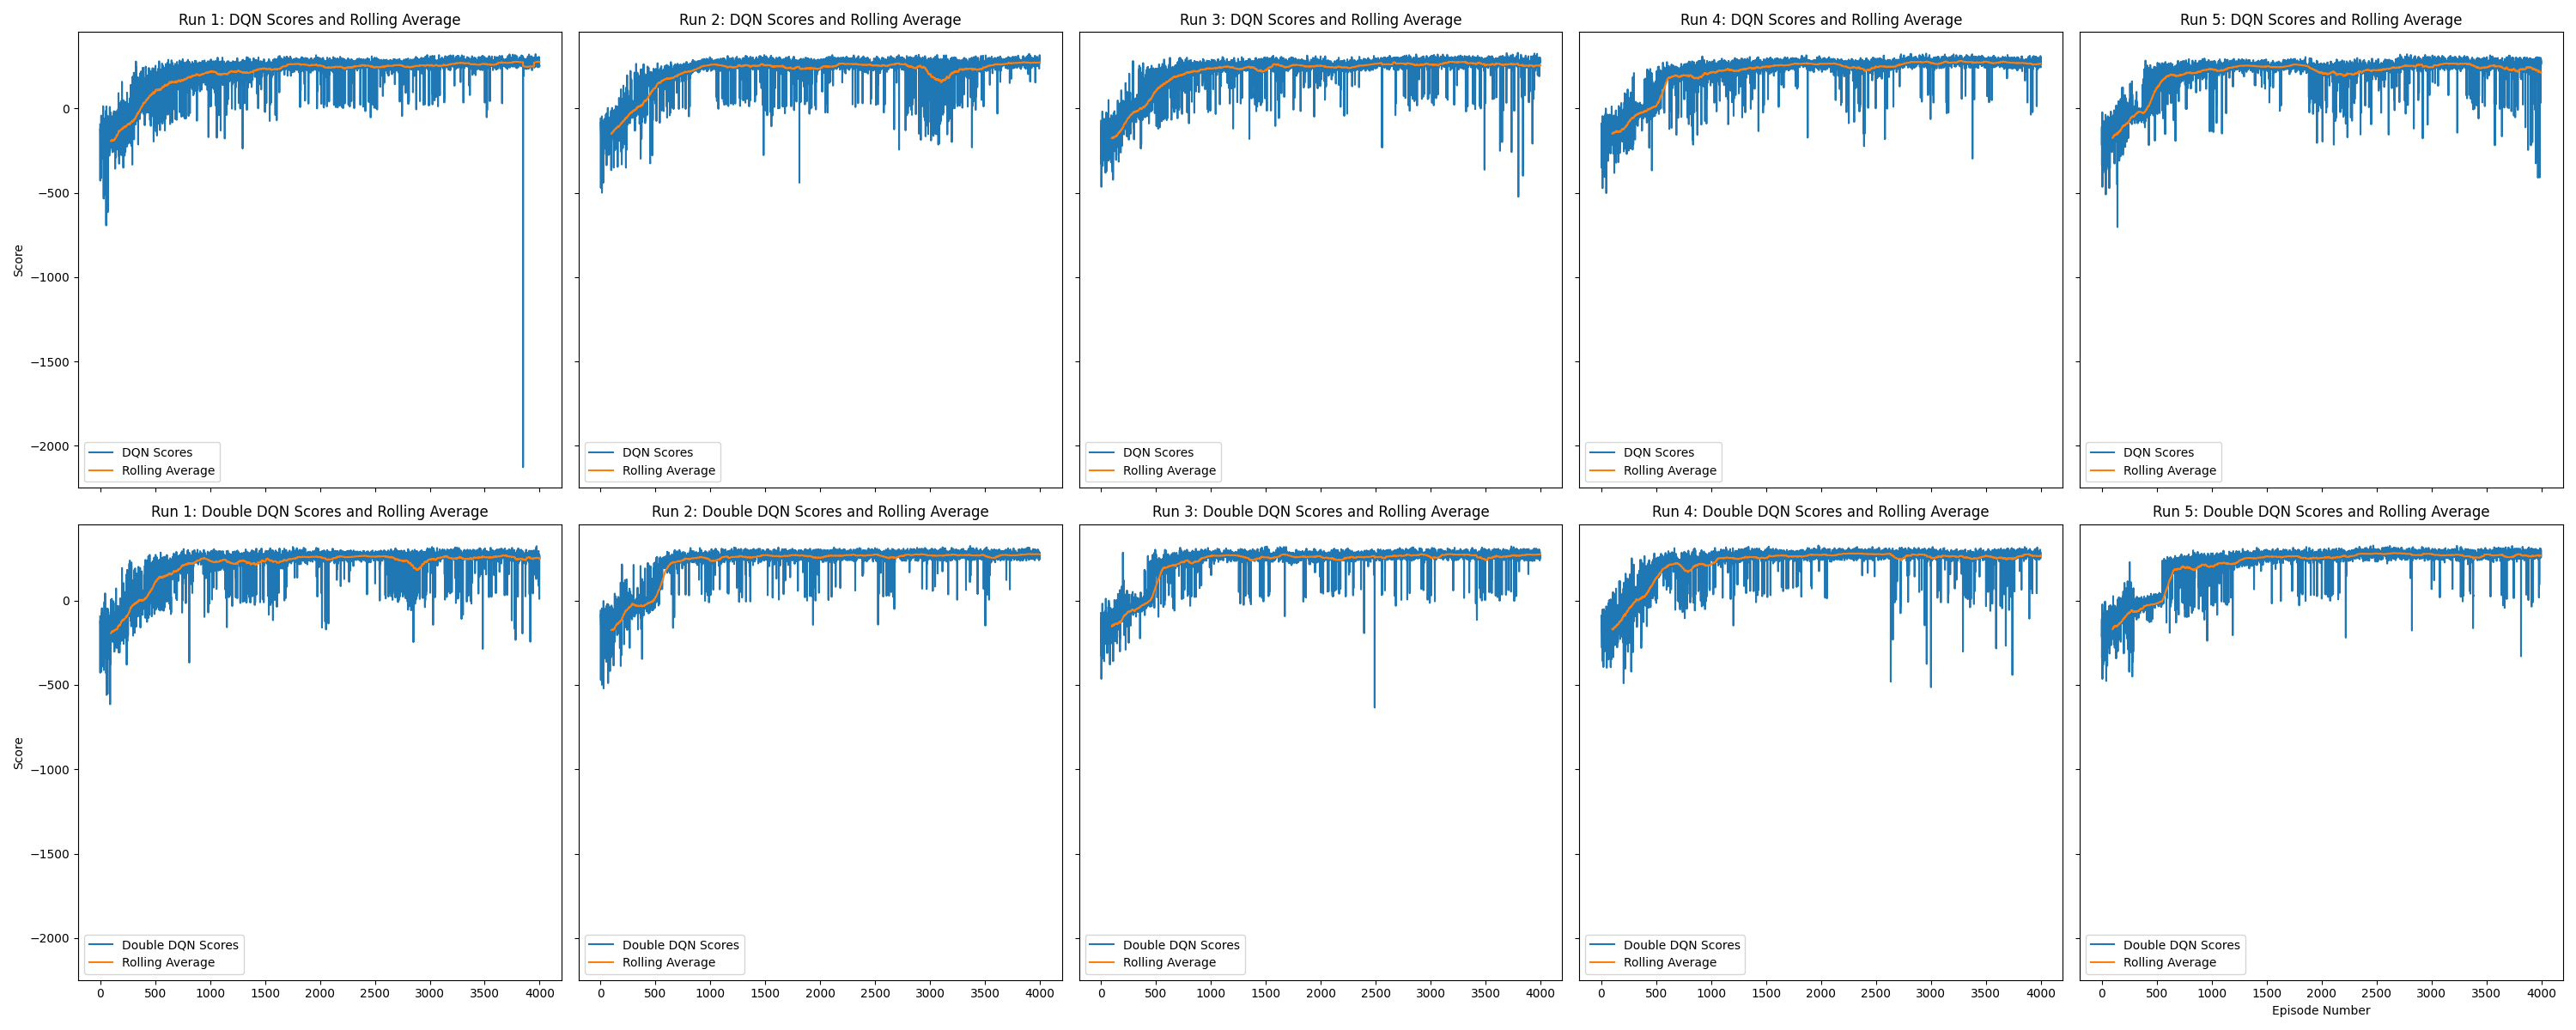

In [4]:
# Print the episodes where the environment was solved
print(f'DQN solved episodes: {dqn_solved_episodes}')
print(f'Double DQN solved episodes: {double_dqn_solved_episodes}')

# Plot the learning curves for comparison
plot_learning_curves(dqn_all_average_rewards, double_dqn_all_average_rewards, dqn_avg_average_rewards, dqn_std_average_rewards, double_dqn_avg_average_rewards, double_dqn_std_average_rewards, num_runs)

# Kernel density plot of the scores
plot_kernel_density(dqn_all_rewards, double_dqn_all_rewards)

# Rolling average plots
plot_rolling_averages(dqn_all_rewards, double_dqn_all_rewards, num_runs)

## Create landing videos of untrained and trained networks

In [5]:
from src.video_recorder_module import create_lunar_lander_videos
from IPython.display import Video, display

# Specify the paths to your trained model files
dqn_model_path = 'outputs/DQNAgent_run1_final.pth'
ddqn_model_path = 'outputs/DoubleDQNAgent_run1_final.pth'

# Create the videos and get their file paths
video_paths = create_lunar_lander_videos(dqn_model_path, ddqn_model_path)

# Display the videos
for i, video_path in enumerate(video_paths):
    if i == 0:
        print("Random Actions:")
    elif i == 1:
        print("Trained DQN:")
    else:
        print("Trained DDQN:")
    display(Video(video_path, embed=True))

[swscaler @ 0x66d9c40] Warning: data is not aligned! This can lead to a speed loss


Random Actions Reward: -309.19533074069386


[swscaler @ 0x5b4fc40] Warning: data is not aligned! This can lead to a speed loss


Trained DQN Reward: 264.12985976984373


[swscaler @ 0x55e6c40] Warning: data is not aligned! This can lead to a speed loss


Trained DDQN Reward: 261.70043185262756
Random Actions:


Trained DQN:


Trained DDQN:


# Evaluate models as soon as environment is considered solved

Testing DQN agent...
Testing DDQN agent...
Low-scoring episodes (DQN < 200): [6, 18, 22, 23, 28, 30, 32, 34, 35, 36, 37, 40, 42, 44, 46, 48, 51, 55, 57, 58, 60, 70, 73, 74, 83, 84, 85, 93, 97, 98, 101, 102, 104, 106, 116, 117, 118, 120, 122, 124, 126, 128, 135, 136, 138, 142, 144, 151, 156, 158, 163, 165, 168, 171, 174, 176, 178, 179, 182, 189, 193, 194, 196, 202, 207, 209, 212, 213, 218, 220, 227, 232, 234, 242, 244, 254, 272, 273, 276, 278, 287, 288, 295, 304, 306, 313, 319, 324, 327, 339, 340, 343, 344, 346, 353, 354, 357, 358, 360, 362, 364, 367, 369, 374, 381, 384, 386, 388, 390, 395, 399, 405, 406, 422, 426, 428, 432, 442, 448, 452, 453, 457, 459, 463, 464, 465, 469, 471, 476, 479, 482, 492, 494, 495, 498, 500, 502, 505, 509, 521, 522, 525, 528, 529, 534, 535, 540, 542, 543, 549, 552, 555, 559, 561, 569, 577, 581, 586, 587, 591, 593, 594, 595, 601, 603, 604, 607, 609, 611, 612, 615, 619, 626, 628, 630, 634, 635, 636, 641, 644, 645, 650, 653, 656, 657, 664, 669, 672, 673, 676, 683

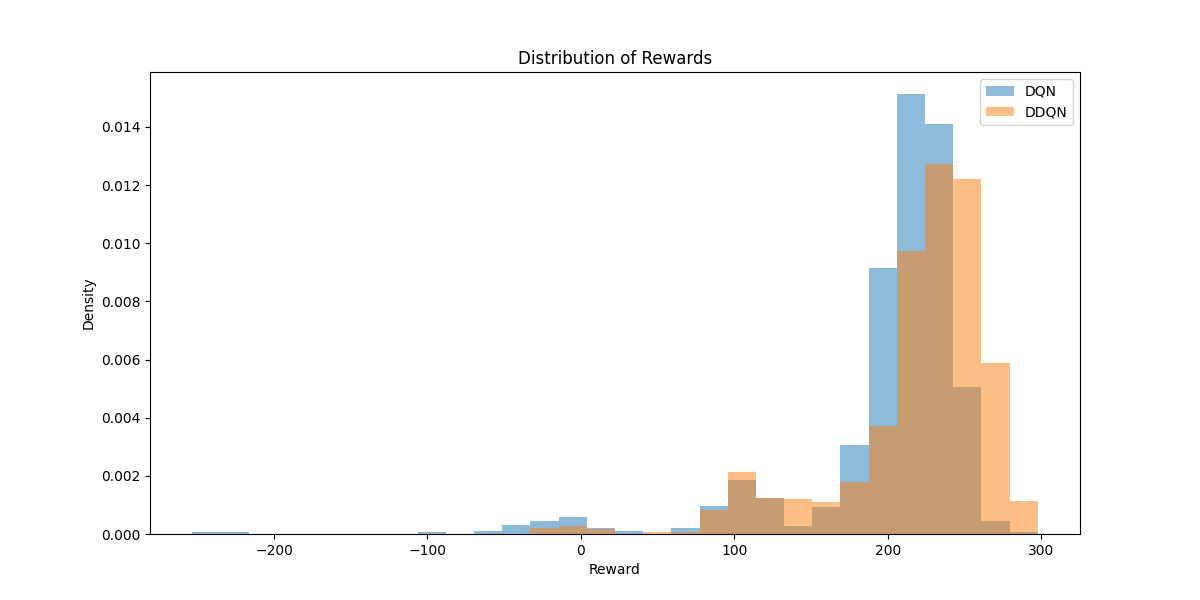

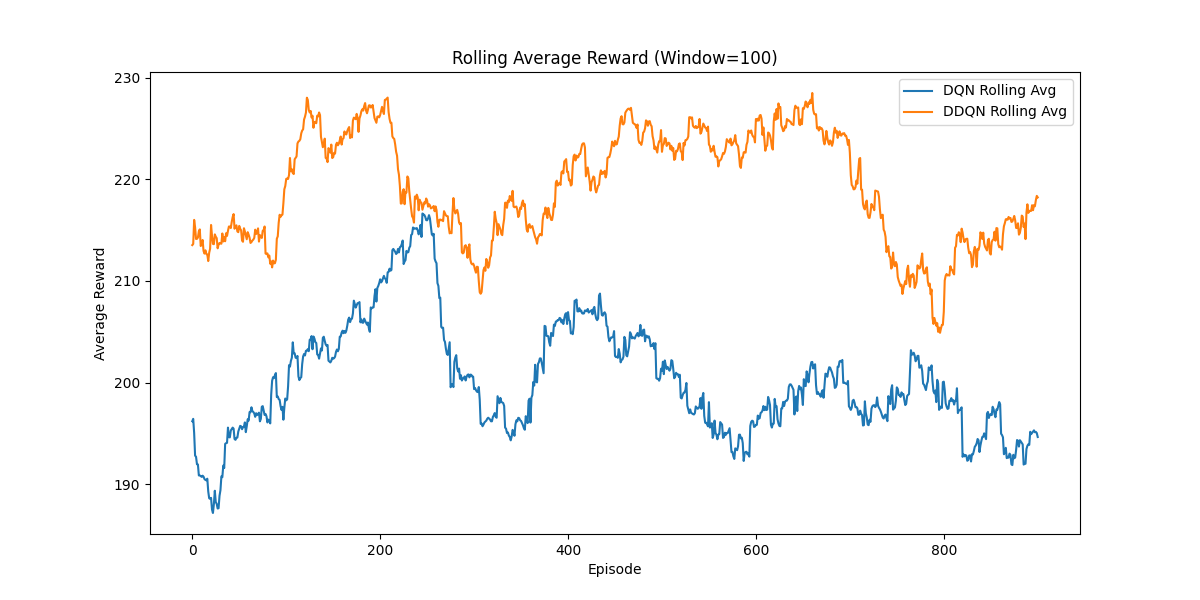

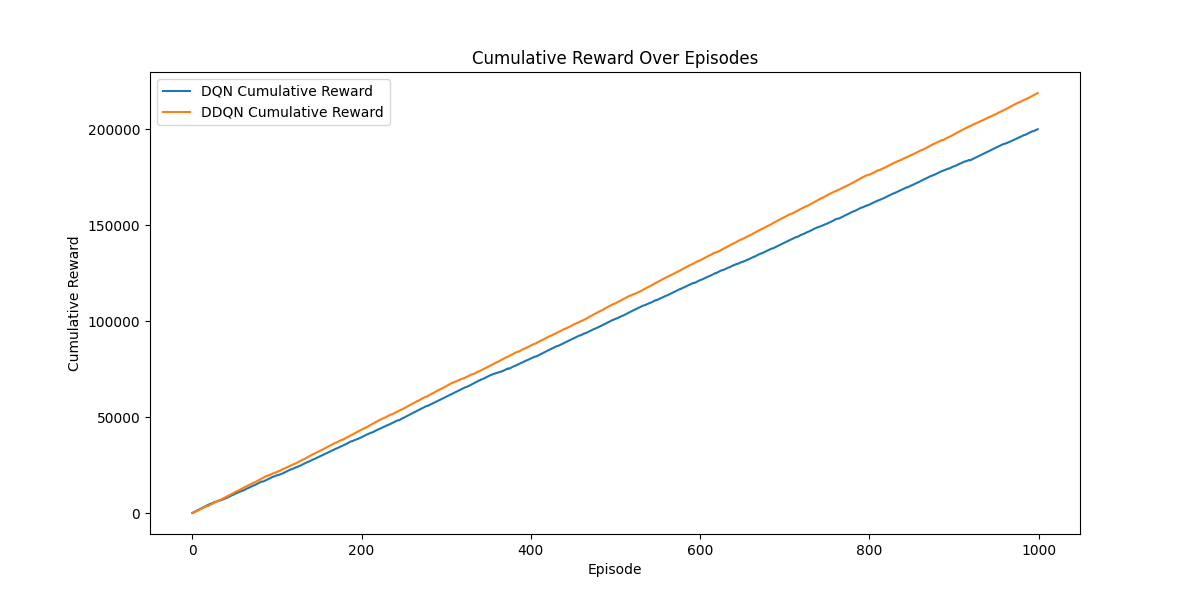

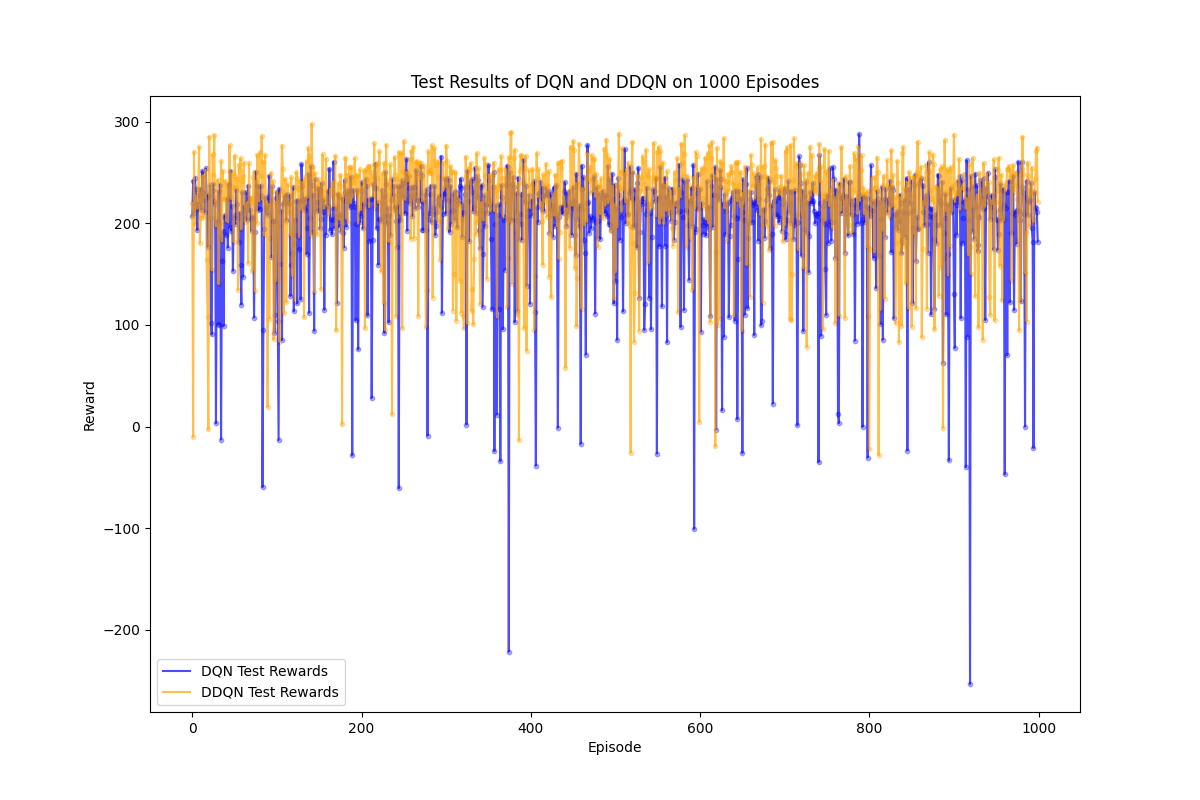

In [1]:
from src.evaluation_module import load_and_test_agent, identify_low_scoring_episodes, compare_agent_performances
from src.DQNAgent_module import DQNAgent
from src.DoubleDQNAgent_module import DoubleDQNAgent
import gymnasium as gym

# Setup environment
env_name = 'LunarLander-v2'
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Paths to your trained model files
dqn_model_path = 'outputs/DQNAgent_run1_solved.pth'
ddqn_model_path = 'outputs/DoubleDQNAgent_run1_solved.pth'

# Load and test both agents
print("Testing DQN agent...")
dqn_test_reward = load_and_test_agent(DQNAgent, env_name, state_size, action_size, dqn_model_path, num_episodes=1000, seed=90)

print("Testing DDQN agent...")
ddqn_test_reward = load_and_test_agent(DoubleDQNAgent, env_name, state_size, action_size, ddqn_model_path, num_episodes=1000, seed=90)

# Identify low-scoring episodes
low_scoring_episodes_dqn = identify_low_scoring_episodes(dqn_test_reward)
low_scoring_episodes_ddqn = identify_low_scoring_episodes(ddqn_test_reward)

print(f'Low-scoring episodes (DQN < 200): {low_scoring_episodes_dqn}')
print(f'Low-scoring episodes (DDQN < 200): {low_scoring_episodes_ddqn}')

# Compare agent performances
compare_agent_performances(dqn_test_reward, ddqn_test_reward, prefix="solved_")

# Evaluate model trained on 4000 episodes

Testing DQN agent...
Testing DDQN agent...
Low-scoring episodes (DQN < 200): [10, 19, 51, 78, 93, 107, 159, 169, 248, 329, 341, 378, 388, 418, 438, 451, 452, 469, 495, 507, 547, 548, 584, 607, 660, 683, 697, 744, 780, 784, 790, 806, 826, 834, 850, 869, 897, 950, 954, 971, 984]
Low-scoring episodes (DDQN < 200): [92, 151, 228, 232, 331, 468, 597, 672, 824, 825, 839, 867, 875, 889, 944, 958]
DQN  - Mean: 269.15, Median: 273.98, Std Dev: 33.58
DDQN - Mean: 274.44, Median: 276.91, Std Dev: 23.63


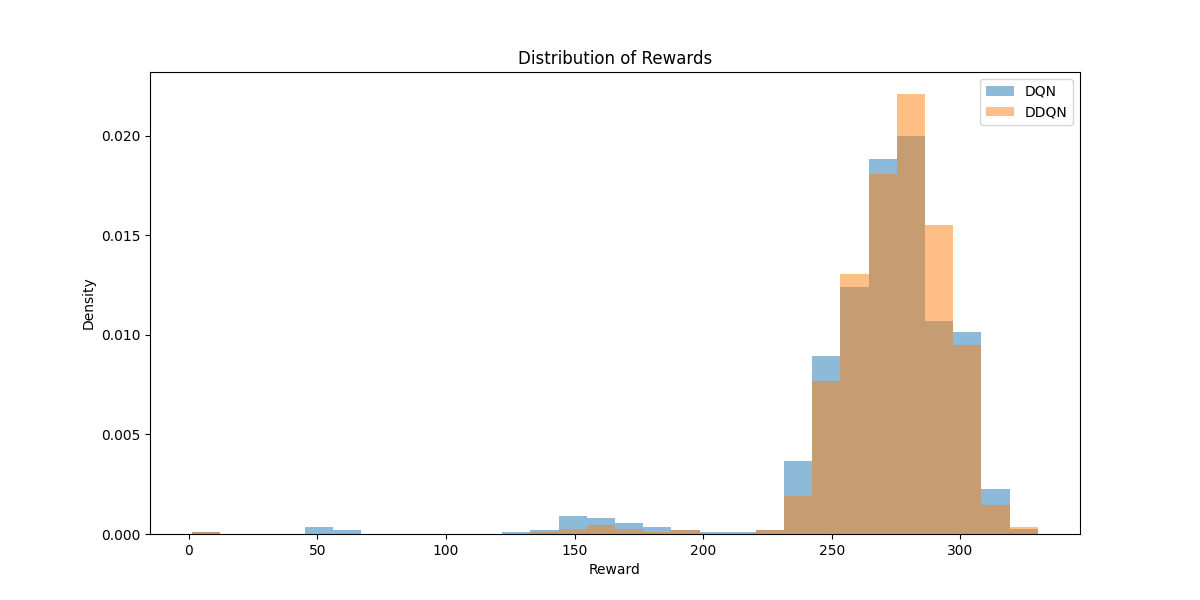

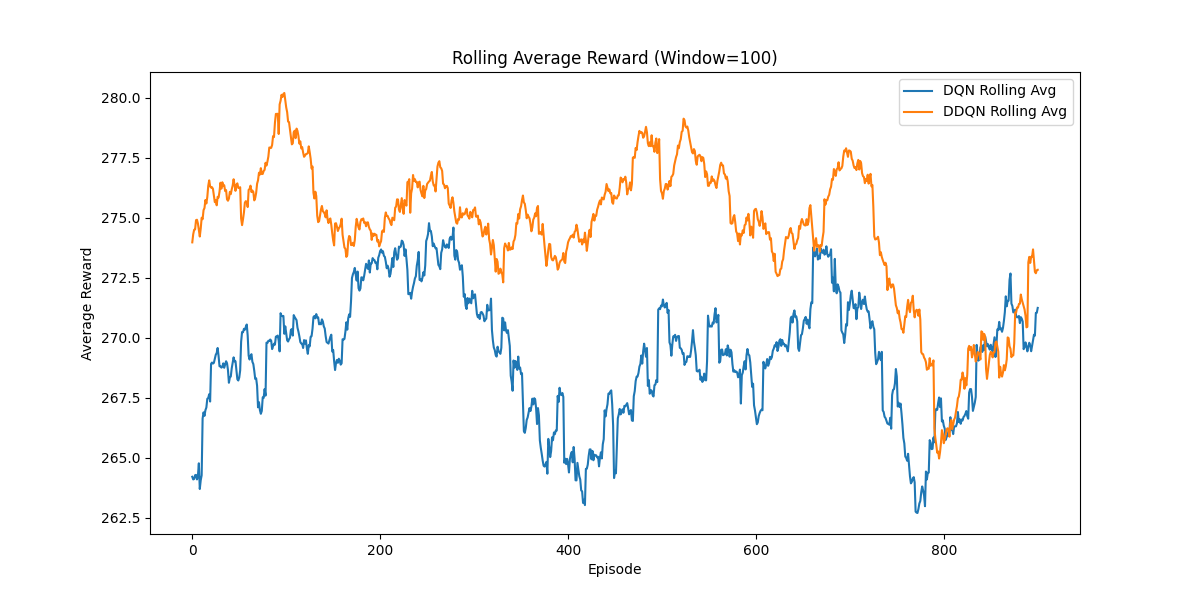

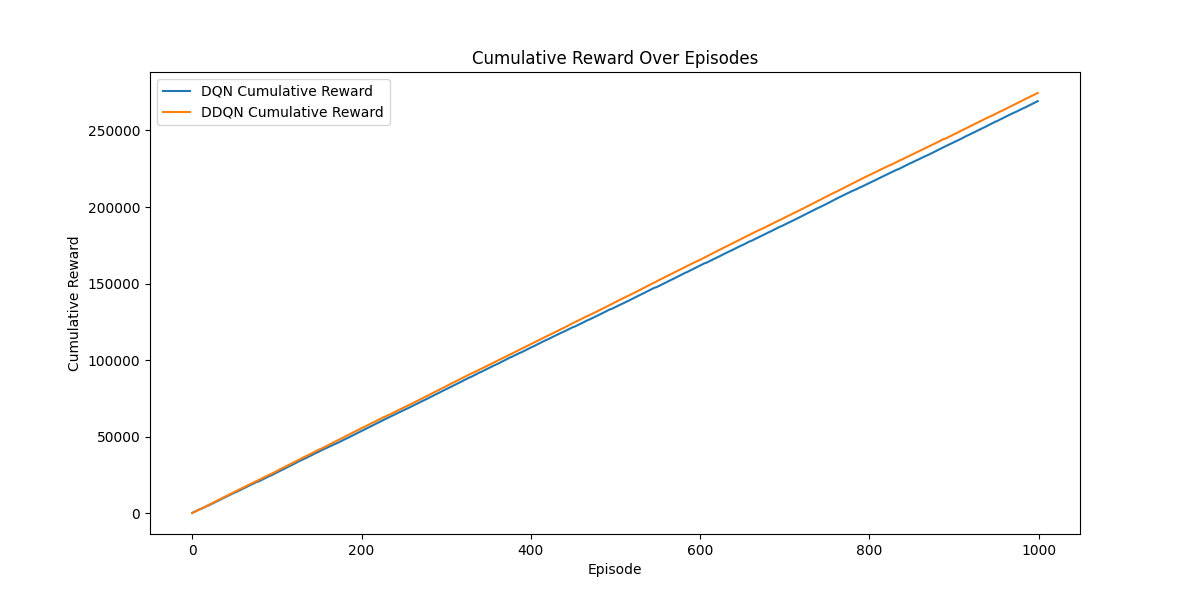

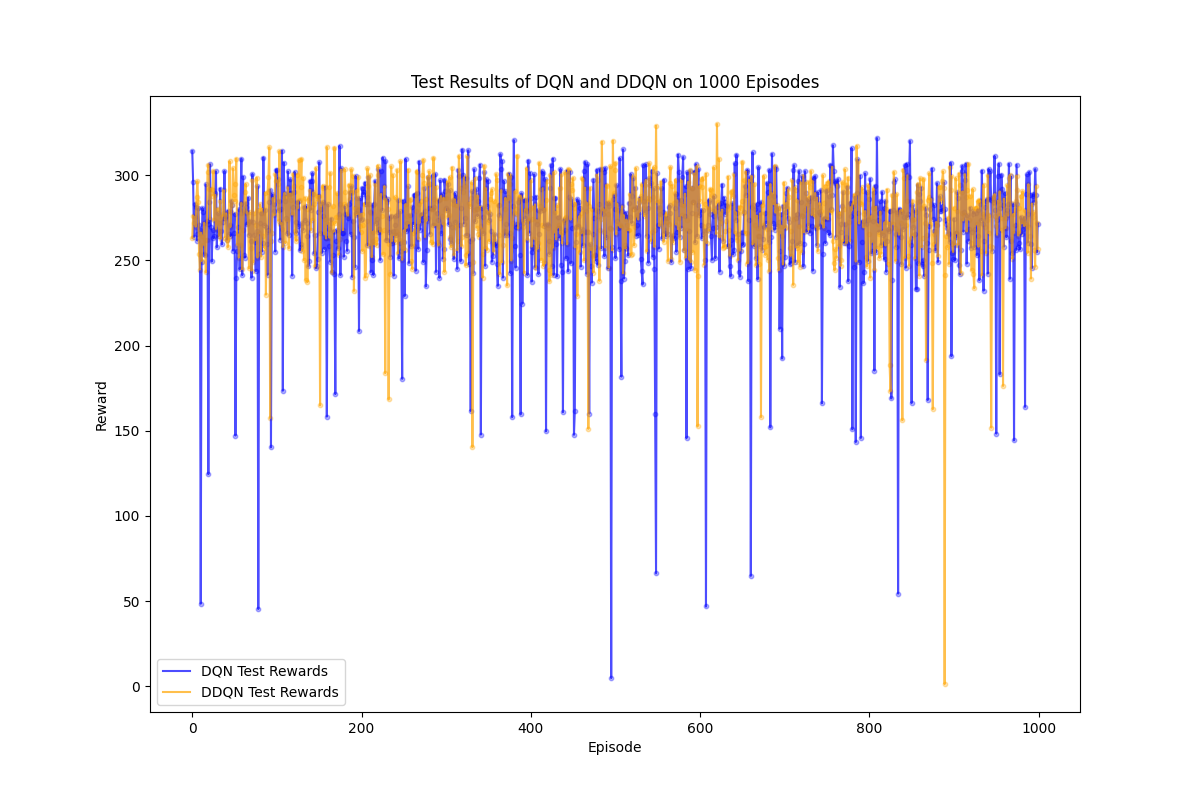

In [2]:
from src.evaluation_module import load_and_test_agent, identify_low_scoring_episodes, compare_agent_performances
from src.DQNAgent_module import DQNAgent
from src.DoubleDQNAgent_module import DoubleDQNAgent
import gymnasium as gym

# Setup environment
env_name = 'LunarLander-v2'
env = gym.make(env_name)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Paths to your trained model files
dqn_model_path = 'outputs/DQNAgent_run1_final.pth'
ddqn_model_path = 'outputs/DoubleDQNAgent_run1_final.pth'

# Load and test both agents
print("Testing DQN agent...")
dqn_test_reward = load_and_test_agent(DQNAgent, env_name, state_size, action_size, dqn_model_path, num_episodes=1000, seed=90)

print("Testing DDQN agent...")
ddqn_test_reward = load_and_test_agent(DoubleDQNAgent, env_name, state_size, action_size, ddqn_model_path, num_episodes=1000, seed=90)

# Identify low-scoring episodes
low_scoring_episodes_dqn = identify_low_scoring_episodes(dqn_test_reward)
low_scoring_episodes_ddqn = identify_low_scoring_episodes(ddqn_test_reward)

print(f'Low-scoring episodes (DQN < 200): {low_scoring_episodes_dqn}')
print(f'Low-scoring episodes (DDQN < 200): {low_scoring_episodes_ddqn}')

# Compare agent performances
compare_agent_performances(dqn_test_reward, ddqn_test_reward, prefix="final_")